## Setup

In [1]:
# Packages
import pandas as pd
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import math

In [2]:
# Import data
tor_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_train_set_no_zeros_interact.csv")


# Quick inspection
tor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8270 entries, 0 to 8269
Data columns (total 32 columns):
DAMAGE_PROPERTY       8270 non-null float64
DURATION_SECONDS      8270 non-null float64
BEGIN_LAT             8270 non-null float64
BEGIN_LON             8270 non-null float64
TOR_LENGTH            8270 non-null float64
TOR_WIDTH             8270 non-null float64
YEAR                  8270 non-null float64
OPEN_WATER_PROP       8270 non-null float64
DEV_OPEN_PROP         8270 non-null float64
DEV_LOW_PROP          8270 non-null float64
DEV_MED_PROP          8270 non-null float64
DEV_HIGH_PROP         8270 non-null float64
DECID_FOREST_PROP     8270 non-null float64
EVERGR_FOREST_PROP    8270 non-null float64
MIXED_FOREST_PROP     8270 non-null float64
SHRUB_SCRUB_PROP      8270 non-null float64
GRASS_LAND_PROP       8270 non-null float64
PASTURE_HAY_PROP      8270 non-null float64
CULT_CROPS_PROP       8270 non-null float64
WOOD_WETLAND_PROP     8270 non-null float64
HERB_WETLAND_

In [3]:
# Seperating variables
# The dependent variables
tornado_outcomes = tor_df.iloc[:, [0]]


# Quick inspection
tornado_outcomes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8270 entries, 0 to 8269
Data columns (total 1 columns):
DAMAGE_PROPERTY    8270 non-null float64
dtypes: float64(1)
memory usage: 64.7 KB


In [4]:
# The independent variables
tornado_features = tor_df.iloc[:, 1:]


# Quick inspection
tornado_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8270 entries, 0 to 8269
Data columns (total 31 columns):
DURATION_SECONDS      8270 non-null float64
BEGIN_LAT             8270 non-null float64
BEGIN_LON             8270 non-null float64
TOR_LENGTH            8270 non-null float64
TOR_WIDTH             8270 non-null float64
YEAR                  8270 non-null float64
OPEN_WATER_PROP       8270 non-null float64
DEV_OPEN_PROP         8270 non-null float64
DEV_LOW_PROP          8270 non-null float64
DEV_MED_PROP          8270 non-null float64
DEV_HIGH_PROP         8270 non-null float64
DECID_FOREST_PROP     8270 non-null float64
EVERGR_FOREST_PROP    8270 non-null float64
MIXED_FOREST_PROP     8270 non-null float64
SHRUB_SCRUB_PROP      8270 non-null float64
GRASS_LAND_PROP       8270 non-null float64
PASTURE_HAY_PROP      8270 non-null float64
CULT_CROPS_PROP       8270 non-null float64
WOOD_WETLAND_PROP     8270 non-null float64
HERB_WETLAND_PROP     8270 non-null float64
BARREN_LAND_P

In [5]:
# Make the dependent variables into a numpy array
outcomes_array = tornado_outcomes.values


# Makes the numpy array into a torch Tensor
outcomes_Tensor = torch.from_numpy(outcomes_array)


# Quick inspection
outcomes_Tensor


 0.9112
 0.0276
 0.4114
   ⋮    
-0.1414
 0.1555
 0.6426
[torch.DoubleTensor of size 8270x1]

In [6]:
# Make the independent variables into a numpy array
features_array = tornado_features.values


# Make the numpy array into a torch Tensor
features_Tensor = torch.from_numpy(features_array)


# Quick inspection
features_Tensor


 1.1178e+00  1.0366e+00 -1.3721e+00  ...  -5.2109e-01  2.2727e-01  7.8470e-01
-3.0203e-01  8.7119e-01  7.4927e-01  ...  -9.9253e-02  3.1779e-01  6.6004e-01
 8.7468e-01 -3.0667e-02 -1.3753e+00  ...  -9.9253e-02  1.0128e+00 -1.1116e+00
                ...                   ⋱                   ...                
-3.0203e-01  1.4788e+00  3.3318e-01  ...  -9.9253e-02  6.1842e-01  8.4193e-01
 1.2240e+00 -8.8898e-01 -8.8288e-01  ...  -9.9253e-02  1.1098e+00 -8.0717e-01
 9.1277e-01 -5.7436e-01  6.9363e-01  ...  -5.2109e-01  1.0484e+00 -2.2743e+00
[torch.DoubleTensor of size 8270x31]

### Convert DoubleTensor to FloatTensor

In [7]:
# Changing dependent variables from a DoubleTensor to a FloatTensor
outcomes_Tensor = outcomes_Tensor.float()


# ...and for the independent variables
features_Tensor = features_Tensor.float()


# Quick check
features_Tensor


 1.1178e+00  1.0366e+00 -1.3721e+00  ...  -5.2109e-01  2.2727e-01  7.8470e-01
-3.0203e-01  8.7119e-01  7.4927e-01  ...  -9.9253e-02  3.1779e-01  6.6004e-01
 8.7468e-01 -3.0667e-02 -1.3753e+00  ...  -9.9253e-02  1.0128e+00 -1.1116e+00
                ...                   ⋱                   ...                
-3.0203e-01  1.4788e+00  3.3318e-01  ...  -9.9253e-02  6.1842e-01  8.4193e-01
 1.2240e+00 -8.8898e-01 -8.8288e-01  ...  -9.9253e-02  1.1098e+00 -8.0717e-01
 9.1277e-01 -5.7436e-01  6.9363e-01  ...  -5.2109e-01  1.0484e+00 -2.2743e+00
[torch.FloatTensor of size 8270x31]

## Round 1: One-Hidden-Layer Neural Network

In [8]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [9]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(31, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 1))

In [10]:
# Set the loss function
loss_fn = torch.nn.MSELoss(size_average=False)

In [11]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 4e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

In [12]:
# Get the iterations
iterations = list(range(0, 10000))

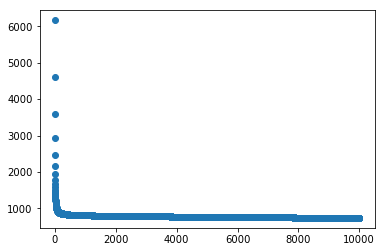

In [13]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [14]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8270)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

In [15]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
outcomes_Variable_resized = outcomes_Variable.resize(8270)


# Make the FloatTensor into a numpy.array
outcomes_array = outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
outcomes_list = outcomes_array.tolist()

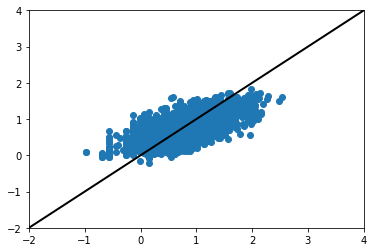

In [16]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.1: Validation Set Performance

In [17]:
# Import data
valid_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_cv_set_no_zeros_interact.csv")


# Validation set outcomes
valid_outcomes = valid_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
valid_outcomes_array = valid_outcomes.values


# Makes the numpy array into a torch Tensor
valid_outcomes_Tensor = torch.from_numpy(valid_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
valid_outcomes_Tensor = valid_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_outcomes_Variable = Variable(valid_outcomes_Tensor)

In [18]:
# Validation set predictors
valid_predictors = valid_df.iloc[:, 1:]


# Make the validation predictors into a numpy array
valid_predictors_array = valid_predictors.values


# Makes the numpy array into a torch Tensor
valid_predictors_Tensor = torch.from_numpy(valid_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
valid_predictors_Tensor = valid_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
valid_predictors_Variable = Variable(valid_predictors_Tensor)

In [19]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(31, 21),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(21, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight

In [20]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 375.4826
[torch.FloatTensor of size 1]

In [21]:
valid_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709 entries, 0 to 2708
Data columns (total 31 columns):
DURATION_SECONDS      2709 non-null float64
BEGIN_LAT             2709 non-null float64
BEGIN_LON             2709 non-null float64
TOR_LENGTH            2709 non-null float64
TOR_WIDTH             2709 non-null float64
YEAR                  2709 non-null float64
OPEN_WATER_PROP       2709 non-null float64
DEV_OPEN_PROP         2709 non-null float64
DEV_LOW_PROP          2709 non-null float64
DEV_MED_PROP          2709 non-null float64
DEV_HIGH_PROP         2709 non-null float64
DECID_FOREST_PROP     2709 non-null float64
EVERGR_FOREST_PROP    2709 non-null float64
MIXED_FOREST_PROP     2709 non-null float64
SHRUB_SCRUB_PROP      2709 non-null float64
GRASS_LAND_PROP       2709 non-null float64
PASTURE_HAY_PROP      2709 non-null float64
CULT_CROPS_PROP       2709 non-null float64
WOOD_WETLAND_PROP     2709 non-null float64
HERB_WETLAND_PROP     2709 non-null float64
BARREN_LAND_P

In [22]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2709)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

In [23]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
valid_outcomes_Variable_resized = valid_outcomes_Variable.resize(2709)


# Make the FloatTensor into a numpy.array
valid_outcomes_array = valid_outcomes_Variable_resized.data.numpy()


# Make the numpy.array into a list
valid_outcomes_list = valid_outcomes_array.tolist()

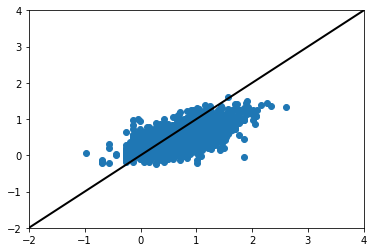

In [24]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 1.2: Test Set Performance

In [25]:
# Import data
test_df = pd.read_csv("/home/jeremy/github_tornadoesr/data/raw/tor_test_set_no_zeros_interact.csv")


# Validation set outcomes
test_outcomes = test_df.iloc[:, [0]]


# Make the validation outcomes into a numpy array
test_outcomes_array = test_outcomes.values


# Makes the numpy array into a torch Tensor
test_outcomes_Tensor = torch.from_numpy(test_outcomes_array)


# Changing validation outcomes from a DoubleTensor to a FloatTensor
test_outcomes_Tensor = test_outcomes_Tensor.float()


# Make the Tensor into a Pytorch Variable
test_outcomes_Variable = Variable(test_outcomes_Tensor)

In [26]:
# Validation set predictors
test_predictors = test_df.iloc[:, 1:]


# Make the validation predictors into a numpy array
test_predictors_array = test_predictors.values


# Makes the numpy array into a torch Tensor
test_predictors_Tensor = torch.from_numpy(test_predictors_array)


# Changing validation predictors from a DoubleTensor to a FloatTensor
test_predictors_Tensor = test_predictors_Tensor.float()


# Make the Tensor into a Pytorch Variable
test_predictors_Variable = Variable(test_predictors_Tensor)

In [27]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model_2 = torch.nn.Sequential(torch.nn.Linear(31, 21),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(21, 1))


# Give the new model the old model's parameters
dim_corrected_model_2[(0)].weight = model[(0)].weight
dim_corrected_model_2[(2)].weight = model[(2)].weight

In [28]:
# Get the validation set predictions
y_test_pred = dim_corrected_model_2(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 302.8730
[torch.FloatTensor of size 1]

In [29]:
test_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2712 entries, 0 to 2711
Data columns (total 31 columns):
DURATION_SECONDS      2712 non-null float64
BEGIN_LAT             2712 non-null float64
BEGIN_LON             2712 non-null float64
TOR_LENGTH            2712 non-null float64
TOR_WIDTH             2712 non-null float64
YEAR                  2712 non-null float64
OPEN_WATER_PROP       2712 non-null float64
DEV_OPEN_PROP         2712 non-null float64
DEV_LOW_PROP          2712 non-null float64
DEV_MED_PROP          2712 non-null float64
DEV_HIGH_PROP         2712 non-null float64
DECID_FOREST_PROP     2712 non-null float64
EVERGR_FOREST_PROP    2712 non-null float64
MIXED_FOREST_PROP     2712 non-null float64
SHRUB_SCRUB_PROP      2712 non-null float64
GRASS_LAND_PROP       2712 non-null float64
PASTURE_HAY_PROP      2712 non-null float64
CULT_CROPS_PROP       2712 non-null float64
WOOD_WETLAND_PROP     2712 non-null float64
HERB_WETLAND_PROP     2712 non-null float64
BARREN_LAND_P

In [30]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2712)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

In [31]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
test_outcomes_Variable_resized = test_outcomes_Variable.resize(2712)


# Make the FloatTensor into a numpy.array
test_outcomes_array = test_outcomes_Variable_resized.data.numpy()


# Convert back to native units and scale
test_outcomes_array = test_outcomes_array*5.409956 + 7.691221


# Make the numpy.array into a list
test_outcomes_list = test_outcomes_array.tolist()

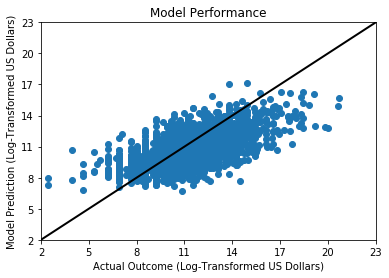

In [32]:
# Plot new predictions versus new data outcomes

plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [33]:
dim_corrected_model_2[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.1056 -0.0257  0.1829 -0.1392  0.1408  0.1998 -0.0118 -0.0645  0.1244 -0.0909
-0.2355 -0.0553  0.0009  0.1247  0.0066 -0.0254  0.0518  0.0105  0.1793 -0.1456
-0.0133  0.0401  0.0005 -0.1313 -0.1480 -0.0650 -0.0501  0.1115  0.1361 -0.0623
-0.0188 -0.2349  0.0329  0.0903  0.2836 -0.0848 -0.0266  0.0575  0.0370 -0.0760
-0.1061 -0.0058 -0.2076 -0.1194  0.1210 -0.1339  0.0254 -0.0604 -0.0443  0.0261
-0.1578  0.0798 -0.0476 -0.0493 -0.1913 -0.0248 -0.0119  0.1328  0.1897 -0.1492
-0.0989 -0.0231  0.0266  0.2165 -0.2532 -0.1025  0.0732  0.1712 -0.0923  0.1534
-0.0781 -0.0114 -0.0817 -0.1441 -0.0530 -0.0684 -0.0144 -0.0641  0.1226 -0.0318
 0.1419  0.0871 -0.0333  0.1310  0.1354 -0.1843  0.1034  0.0232 -0.1207 -0.0067
 0.0152 -0.1280  0.1843 -0.0840 -0.0895 -0.0944 -0.1387 -0.1852 -0.0988  0.1540
 0.1125 -0.0966 -0.1176 -0.0108  0.0959  0.0959  0.0316  0.0260  0.0548  0.0335
-0.0712 -0.0659  0.0938 -0.0650  0.0711 -0.1038  0.0379 -0.0287  0.0988  0.1337
-

In [34]:
dim_corrected_model_2[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.2203  0.1667  0.0476  0.1723 -0.2800  0.0247 -0.2589 -0.0863 -0.2011  0.1183

Columns 10 to 19 
 0.2541  0.0660  0.1423 -0.0843  0.2286  0.1895  0.2213 -0.1673  0.1862  0.2275

Columns 20 to 20 
 0.2389
[torch.FloatTensor of size 1x21]

## Round 2: Two-Hidden-Layer Neural Network

In [35]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [36]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(31, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 1))

In [37]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 6e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

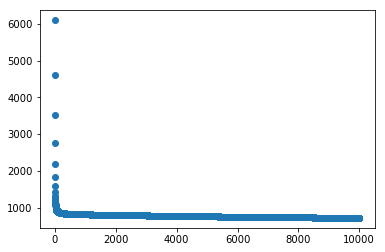

In [38]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [39]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8270)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

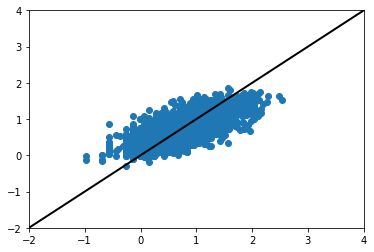

In [40]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.1: Validation Set Performance

In [41]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(31, 21),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(21, 14),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(14, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight

In [42]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 1477.7748
[torch.FloatTensor of size 1]

In [43]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2709)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

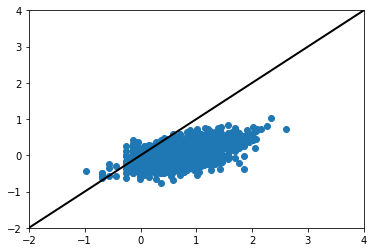

In [44]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 2.2: Test Set Performance

In [45]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model_2 = torch.nn.Sequential(torch.nn.Linear(31, 21),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(21, 14),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(14, 1))


# Give the new model the old model's parameters
dim_corrected_model_2[(0)].weight = model[(0)].weight
dim_corrected_model_2[(2)].weight = model[(2)].weight
dim_corrected_model_2[(4)].weight = model[(4)].weight

In [46]:
# Get the validation set predictions
y_test_pred = dim_corrected_model_2(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 519.2403
[torch.FloatTensor of size 1]

In [47]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2712)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

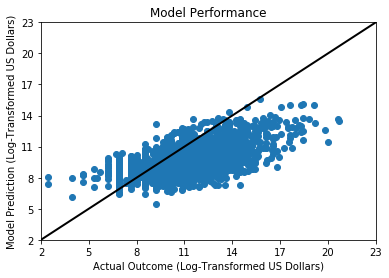

In [48]:
# Plot new predictions versus new data outcomes

plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [49]:
dim_corrected_model_2[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.0600  0.0334 -0.1065  0.0149  0.1203  0.1883  0.0768  0.1810  0.1699  0.0484
 0.0469  0.0590 -0.1472 -0.1249  0.0801 -0.0190 -0.0792  0.0906 -0.1819 -0.0852
 0.0307 -0.0949  0.1107 -0.0565 -0.0267  0.2492 -0.0887  0.1153 -0.0860  0.1456
 0.0367  0.2685  0.0590 -0.0056  0.0957  0.0317  0.0991 -0.0619  0.0323  0.1656
 0.0238  0.2127 -0.0068 -0.1711 -0.1409  0.1123 -0.0877  0.0054  0.0758 -0.0630
 0.2551 -0.1567 -0.1306  0.0135 -0.0641  0.1012 -0.1099 -0.0979  0.0085  0.0834
 0.1304  0.2880  0.2084  0.1057  0.1756 -0.0849  0.0995  0.0109  0.0884  0.1242
-0.0331  0.0146 -0.0564 -0.1947  0.0363  0.2422 -0.1164 -0.1838 -0.0563  0.0162
 0.3046  0.0090  0.0013  0.0748  0.1623  0.0956 -0.0307 -0.0137 -0.0734  0.0044
 0.0618 -0.1578 -0.1015 -0.0064  0.3084 -0.0903 -0.0069  0.0993 -0.0129  0.1073
-0.1798  0.0445 -0.0484  0.0463  0.1341 -0.0923  0.0928  0.0496  0.0704 -0.0727
 0.0569 -0.2172  0.0510  0.0218 -0.0332  0.0264 -0.0898  0.1429 -0.0383 -0.0913
-

In [50]:
dim_corrected_model_2[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.0225  0.0617 -0.1809 -0.0995 -0.1785 -0.2355 -0.0476 -0.0826  0.0306  0.2138
 0.1135  0.1323  0.0440  0.0687 -0.2179  0.2130  0.1330  0.0631  0.2538  0.1067
 0.1706 -0.2181  0.2418 -0.0258  0.1181 -0.1462 -0.1155  0.1555 -0.1624 -0.0009
-0.1271  0.1676 -0.1768  0.0313 -0.1882 -0.1146  0.0217 -0.0670  0.1156 -0.1030
 0.1282  0.1029 -0.0944 -0.1436  0.0883  0.1091  0.1563  0.0030  0.2353  0.0850
-0.1354 -0.1391 -0.1391  0.1440  0.0116 -0.0588  0.1772 -0.0806  0.2354  0.2230
-0.2136  0.0601  0.2216 -0.1867 -0.0505 -0.1590 -0.0574 -0.0324 -0.1212  0.0211
 0.2957 -0.3038  0.0846 -0.0139 -0.1243  0.0405  0.1956 -0.0641 -0.1227 -0.1185
-0.0156  0.1482  0.1191 -0.0251  0.1855  0.1964  0.2528 -0.3064 -0.0761 -0.1421
 0.2470 -0.1738  0.1961 -0.0006 -0.0153  0.0907 -0.1896 -0.1454 -0.0169  0.1176
-0.2361 -0.1492 -0.1005  0.0704  0.2229  0.1322  0.0907 -0.2093  0.1056 -0.1641
-0.1271 -0.2233  0.2159  0.1377 -0.0053  0.2387 -0.0325 -0.2296  0.0559 -0.3277
-

In [51]:
dim_corrected_model_2[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.2545  0.3396  0.2004 -0.1280  0.3358  0.4494 -0.2577 -0.4981  0.3737  0.3041

Columns 10 to 13 
 0.3849 -0.4958 -0.0221 -0.4615
[torch.FloatTensor of size 1x14]

## Round 3: Three-Hidden-Layers Neural Network

In [52]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [53]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(31, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 1))

In [54]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

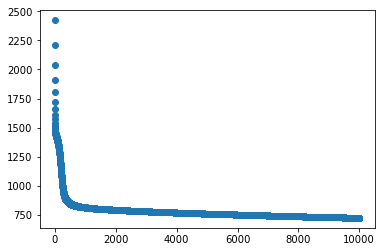

In [55]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [56]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8270)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

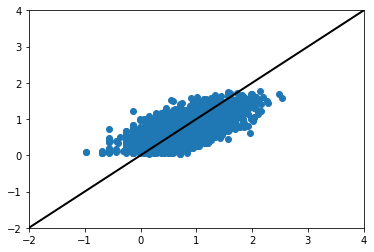

In [57]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.1: Validation Set Performance

In [58]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(31, 21),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(21, 14),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(14, 9),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(9, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight

In [59]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 1892.3357
[torch.FloatTensor of size 1]

In [60]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2709)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

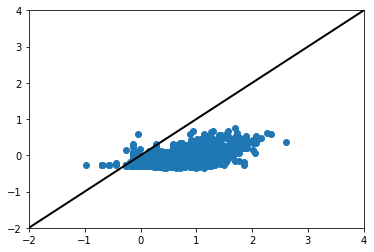

In [61]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 3.2: Test Set Performance

In [62]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model_2 = torch.nn.Sequential(torch.nn.Linear(31, 21),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(21, 14),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(14, 9),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(9, 1))


# Give the new model the old model's parameters
dim_corrected_model_2[(0)].weight = model[(0)].weight
dim_corrected_model_2[(2)].weight = model[(2)].weight
dim_corrected_model_2[(4)].weight = model[(4)].weight
dim_corrected_model_2[(6)].weight = model[(6)].weight

In [63]:
# Get the validation set predictions
y_test_pred = dim_corrected_model_2(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 1185.2614
[torch.FloatTensor of size 1]

In [64]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2712)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

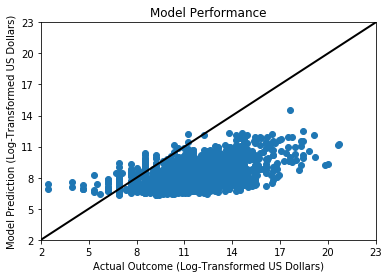

In [65]:
# Plot new predictions versus new data outcomes

plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [66]:
dim_corrected_model_2[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.1214  0.0121  0.1132 -0.0767  0.0063 -0.1866 -0.2154  0.1207  0.0055  0.0661
 0.1124  0.0241  0.2462 -0.0248  0.1595 -0.1508  0.0272 -0.0615 -0.0617  0.0493
 0.0491 -0.0580  0.0092  0.1583 -0.1507 -0.0218  0.0840  0.0425 -0.0623 -0.0903
 0.0251 -0.1183 -0.2061  0.0112 -0.0978 -0.3127 -0.0452  0.0003 -0.0425 -0.0585
-0.1316  0.1193 -0.2274 -0.1209  0.0041 -0.1663 -0.0282  0.0972 -0.1667  0.1383
 0.1162 -0.0466 -0.1136  0.2242  0.1004  0.0535 -0.0148  0.1482 -0.0399  0.0704
-0.0810  0.1287  0.1711  0.1886  0.0356  0.0227 -0.1287 -0.1387 -0.1517 -0.0079
 0.0638  0.2662  0.2230  0.1172  0.2139 -0.2306  0.2113  0.0057  0.0719  0.0088
-0.0305 -0.0310  0.0731 -0.2049 -0.0641 -0.1094  0.0358 -0.2044 -0.0219  0.0775
 0.0826  0.0467 -0.1823 -0.1815  0.0775 -0.1953  0.0897 -0.0034 -0.1378  0.0836
 0.1075  0.0998  0.1005  0.0940  0.1522 -0.0679 -0.1454 -0.0294  0.0398 -0.0934
 0.0562 -0.2638 -0.0658 -0.0794  0.2965 -0.0237  0.0937  0.0752 -0.0198  0.0872
 

In [67]:
dim_corrected_model_2[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0118 -0.0326  0.1724 -0.1575  0.1464  0.0819 -0.0049 -0.0811 -0.1762 -0.1996
 0.1598  0.1072  0.2001  0.0562 -0.0763  0.1358  0.1757  0.1560  0.1714 -0.2485
 0.0739 -0.0701  0.0107  0.0984 -0.1169 -0.0982 -0.0174 -0.1120  0.0766 -0.1344
-0.0984  0.3109  0.0370  0.2300  0.2624 -0.0259  0.1545 -0.2107  0.0013  0.0873
-0.0438  0.2364 -0.1322 -0.1750 -0.0388 -0.0454  0.1686  0.1932  0.0218 -0.1495
 0.0036 -0.0815  0.0785 -0.0750 -0.1800  0.1211  0.0503  0.0353  0.0121 -0.0555
-0.1543 -0.0224  0.1950  0.0436  0.0465  0.0400  0.2209  0.0382 -0.0440 -0.2209
 0.0632 -0.0677  0.0231 -0.1258  0.1046  0.0856  0.0546  0.1419  0.0090  0.0191
 0.1473  0.1980  0.1742 -0.0919 -0.2267 -0.2227 -0.2235  0.1868 -0.1997  0.0948
 0.1877 -0.0768  0.0693 -0.0585 -0.0916 -0.1296 -0.1420 -0.1747 -0.1224 -0.1201
 0.2468  0.1988  0.1494  0.1868 -0.1394  0.1696 -0.0430  0.0181 -0.0147  0.0173
 0.0792  0.1159 -0.1760  0.1731 -0.1203 -0.1994 -0.0218 -0.0638 -0.1871 -0.0488
-

In [68]:
dim_corrected_model_2[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.1833  0.1360  0.2926 -0.3854  0.2333  0.0321  0.2802  0.0495 -0.3801  0.3972
 0.1804 -0.1779  0.0888 -0.1443  0.2170 -0.2389 -0.1076 -0.0198 -0.2578  0.0024
 0.0017 -0.0003  0.0757 -0.2462  0.3057 -0.2160 -0.1435 -0.1956  0.1323 -0.0047
 0.0954  0.1709  0.2918 -0.3971  0.2454 -0.0327  0.0933 -0.1250 -0.0325  0.1722
-0.1293 -0.0972  0.0744  0.1789  0.1308  0.1604  0.0526  0.2337 -0.2464  0.0822
-0.2313 -0.0831  0.0571 -0.0597 -0.0360 -0.0171  0.1784 -0.1831  0.1474  0.0582
 0.1030 -0.0641 -0.2115  0.2552 -0.0779  0.0341  0.0026 -0.0725 -0.0558 -0.0739
-0.0633 -0.1723  0.2605 -0.0115  0.1164 -0.0725 -0.1979 -0.0445  0.2412 -0.1981
 0.1598 -0.3094  0.2128 -0.2458  0.0360  0.2719  0.2818 -0.1146 -0.1935 -0.2736

Columns 10 to 13 
 0.2212 -0.1965  0.3664  0.2913
 0.1111  0.0188 -0.2218 -0.0847
 0.0288 -0.1856 -0.2425 -0.2152
 0.2133  0.2653 -0.0033  0.1734
-0.0237  0.0518  0.0249  0.0865
 0.0384  0.0187 -0.1524  0.1952
-0.0444 -0.2105  0.0221 -0.019

In [69]:
dim_corrected_model_2[(6)].weight

Parameter containing:
 0.8633  0.0616 -0.5070  0.5384  0.0789 -0.2986 -0.3249  0.1824 -0.4149
[torch.FloatTensor of size 1x9]

## Round 4: Four-Hidden-Layer Neural Network

In [70]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [71]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(31, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 1))

In [72]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

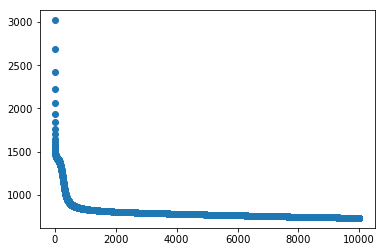

In [73]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [74]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8270)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

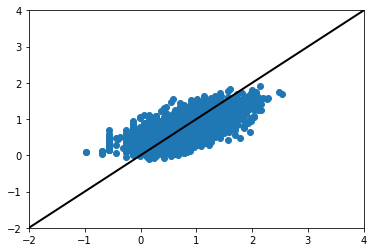

In [75]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.1: Validation Set Performance

In [76]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(31, 21),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(21, 14),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(14, 9),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(9, 6),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(6, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight
dim_corrected_model[(8)].weight = model[(8)].weight

In [77]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 834.5248
[torch.FloatTensor of size 1]

In [78]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2709)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

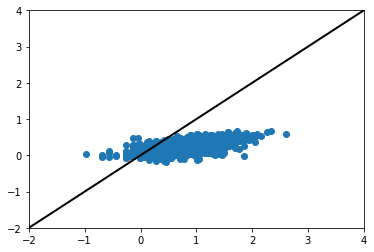

In [79]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 4.2: Test Set Performance

In [80]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model_2 = torch.nn.Sequential(torch.nn.Linear(31, 21),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(21, 14),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(14, 9),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(9, 6),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(6, 1))


# Give the new model the old model's parameters
dim_corrected_model_2[(0)].weight = model[(0)].weight
dim_corrected_model_2[(2)].weight = model[(2)].weight
dim_corrected_model_2[(4)].weight = model[(4)].weight
dim_corrected_model_2[(6)].weight = model[(6)].weight
dim_corrected_model_2[(8)].weight = model[(8)].weight

In [81]:
# Get the validation set predictions
y_test_pred = dim_corrected_model_2(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 1843.7224
[torch.FloatTensor of size 1]

In [82]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2712)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

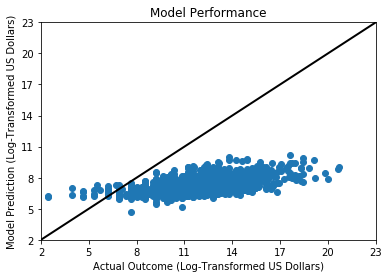

In [83]:
# Plot new predictions versus new data outcomes

plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [84]:
dim_corrected_model_2[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.2936  0.1469 -0.1859  0.0767  0.1175  0.0892  0.0349  0.0482 -0.0090  0.0858
 0.1829  0.0954  0.0089 -0.1251  0.1549  0.0839  0.0259  0.0744 -0.0475  0.1439
 0.0535 -0.0495  0.1286  0.0084 -0.1935 -0.0545  0.0922  0.1218  0.1000 -0.0487
-0.0251 -0.1831 -0.0358 -0.0559  0.0794 -0.0280  0.0629  0.0300  0.0292  0.0068
 0.0152  0.0150  0.0978 -0.0356  0.0448  0.0392 -0.1374  0.0209  0.0737  0.0033
-0.0559 -0.0831  0.1200  0.0429 -0.1364  0.2540  0.0895  0.0792 -0.1269  0.0157
-0.1059  0.0472 -0.0032  0.1585 -0.2277  0.0140  0.0471  0.1043 -0.0004 -0.0178
-0.1355 -0.1607 -0.2268 -0.0384 -0.1095 -0.1141 -0.0509  0.1543  0.1228 -0.0365
 0.2345  0.1442  0.1598  0.1401  0.0241 -0.1410 -0.1491  0.1424  0.0450  0.0542
-0.1080 -0.0116  0.0393 -0.0357 -0.2336 -0.0160  0.1610  0.0152  0.1082  0.0609
-0.2074  0.0447  0.0853  0.0454  0.1315  0.0318  0.0634  0.0522  0.0379  0.1840
 0.0404 -0.0549  0.2305  0.2622  0.0723 -0.1350  0.0018 -0.0825 -0.1793  0.1138
 

In [85]:
dim_corrected_model_2[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0799  0.1837  0.0874 -0.2055 -0.0362 -0.0101  0.1090  0.1951  0.0908  0.1099
 0.0468 -0.0691 -0.0803 -0.1665 -0.2208 -0.0855 -0.1198  0.0362  0.2024 -0.0358
-0.1849 -0.1692  0.1781 -0.0672 -0.1323 -0.0038  0.1916  0.1629  0.1396 -0.1091
-0.1514 -0.1153  0.0550  0.0451  0.1054  0.0906  0.1532 -0.1839  0.2804  0.0527
 0.2899 -0.1430 -0.0358  0.1695 -0.3069 -0.2337 -0.0129 -0.0799  0.2220 -0.0480
 0.1753  0.1436 -0.1783 -0.1195 -0.1152  0.1366  0.0960  0.1147 -0.0995  0.1498
 0.1819  0.0273 -0.0494  0.0515  0.0657  0.0205  0.2158  0.1711  0.1545  0.0817
 0.2271 -0.0166 -0.1969 -0.2490 -0.1346  0.0718  0.2030 -0.1094 -0.1137 -0.0071
 0.1763 -0.1756 -0.0683  0.0942  0.0570 -0.1047 -0.0189  0.2021 -0.0221 -0.0706
 0.0858 -0.2251  0.1062  0.2443 -0.1285  0.1742 -0.0014  0.1029  0.1076 -0.0792
-0.0282 -0.0682 -0.1344  0.0297 -0.1463  0.0397  0.0850  0.1901 -0.0528  0.1686
-0.0314 -0.0082  0.0849  0.1575  0.2010  0.2111  0.0101 -0.1591  0.1689 -0.1103
 

In [86]:
dim_corrected_model_2[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.1448  0.2591  0.2361 -0.2408  0.0708 -0.1392 -0.2384  0.0509  0.2698  0.1632
 0.2508  0.0248  0.1855 -0.3913  0.3081  0.2883  0.1068 -0.2295  0.2797  0.0844
 0.1419  0.0847  0.0773  0.2149 -0.0284 -0.1802  0.1266  0.2642 -0.1739 -0.0201
 0.1777 -0.2241  0.1232 -0.1496  0.2433  0.2168 -0.1604 -0.2296  0.1699 -0.0634
-0.2487 -0.0307 -0.1266 -0.0013  0.3804 -0.0598  0.0718  0.0392  0.0123  0.3134
-0.0913 -0.0800 -0.1227  0.0725 -0.2794 -0.2470 -0.1551 -0.0943 -0.1552  0.1090
 0.2394  0.0803 -0.2551  0.2003 -0.0659  0.1194  0.0097 -0.1418 -0.0404 -0.1382
-0.1956 -0.0948 -0.1509  0.3191 -0.2387  0.1794  0.2012  0.2597  0.2535 -0.3741
 0.0119  0.2269 -0.1647  0.0046  0.2892 -0.1044 -0.2413  0.1924 -0.1646  0.1519

Columns 10 to 13 
 0.0739  0.2409 -0.0221  0.1991
 0.0670 -0.1291 -0.2753  0.3057
-0.0798 -0.0230  0.3057  0.1437
-0.0273  0.1801  0.0230 -0.0424
 0.1263  0.1238 -0.1645 -0.0738
 0.1748  0.1475  0.2031 -0.1313
 0.0154 -0.1409  0.1771 -0.179

In [87]:
dim_corrected_model_2[(6)].weight

Parameter containing:
 0.1504 -0.3768  0.2413 -0.2738 -0.2328  0.1271  0.0921  0.2628  0.0569
 0.0969 -0.1838  0.2341 -0.3741 -0.1167 -0.0178  0.2063  0.2066 -0.2784
 0.1514  0.4518  0.1080 -0.1389  0.2012 -0.2758 -0.0325 -0.3538  0.0670
 0.0163 -0.3138 -0.2865  0.1901  0.0340 -0.2267  0.1935  0.3023 -0.0782
 0.3258  0.0417 -0.0287  0.2551 -0.2545  0.1887  0.0543 -0.0531 -0.2451
 0.2609  0.5876 -0.1576  0.0564  0.3219 -0.2364  0.0592 -0.3308  0.1547
[torch.FloatTensor of size 6x9]

In [88]:
dim_corrected_model_2[(8)].weight

Parameter containing:
-0.6373 -0.3889  0.5518 -0.1776 -0.0866  0.7237
[torch.FloatTensor of size 1x6]

## Round 5: Five-Hidden-Layer Neural Network

In [89]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [90]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(31, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 1))

In [91]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

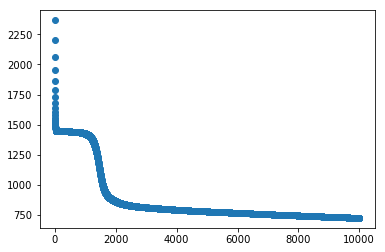

In [92]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [93]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8270)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

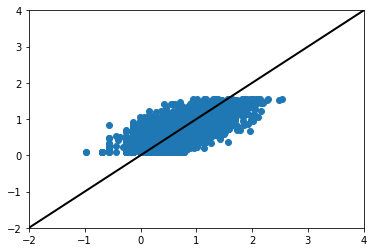

In [94]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.1: Validation Set Performance

In [95]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(31, 21),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(21, 14),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(14, 9),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(9, 6),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(6, 4),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(4, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight
dim_corrected_model[(8)].weight = model[(8)].weight
dim_corrected_model[(10)].weight = model[(10)].weight

In [96]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 1486.1229
[torch.FloatTensor of size 1]

In [97]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2709)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

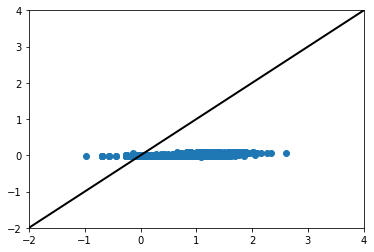

In [98]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 5.2: Test Set Performance

In [99]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model_2 = torch.nn.Sequential(torch.nn.Linear(31, 21),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(21, 14),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(14, 9),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(9, 6),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(6, 4),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(4, 1))


# Give the new model the old model's parameters
dim_corrected_model_2[(0)].weight = model[(0)].weight
dim_corrected_model_2[(2)].weight = model[(2)].weight
dim_corrected_model_2[(4)].weight = model[(4)].weight
dim_corrected_model_2[(6)].weight = model[(6)].weight
dim_corrected_model_2[(8)].weight = model[(8)].weight
dim_corrected_model_2[(10)].weight = model[(10)].weight

In [100]:
# Get the validation set predictions
y_test_pred = dim_corrected_model_2(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 5543.4727
[torch.FloatTensor of size 1]

In [101]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2712)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

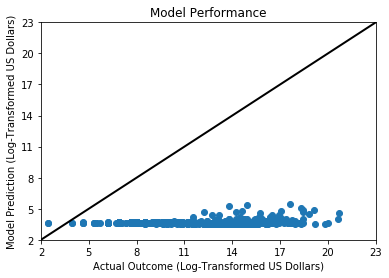

In [102]:
# Plot new predictions versus new data outcomes

plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [103]:
dim_corrected_model_2[(0)].weight

Parameter containing:

Columns 0 to 5 
-5.4235e-02 -2.4100e-01  1.2196e-01  1.2501e-01  1.7733e-01 -4.6526e-02
-3.5244e-02 -4.2666e-04 -5.6737e-02  1.5488e-01 -2.1864e-01 -1.2802e-01
 4.8100e-02 -1.6414e-01  1.0119e-01  3.3527e-03 -6.5375e-02  1.4250e-01
-3.7710e-02 -2.4102e-01  1.2725e-01 -1.2518e-03 -7.5403e-02 -3.1579e-03
-1.8515e-01  1.5773e-01 -4.9607e-02 -1.4760e-01  1.8843e-02  1.7888e-01
-2.4538e-02  8.8119e-02  1.0219e-01 -2.2067e-01  7.9197e-02 -1.6202e-01
-8.9219e-02 -7.9098e-02 -5.0851e-02 -4.0007e-02  2.1425e-01  5.4576e-02
-7.9470e-02  4.2265e-02  9.2562e-02 -1.1175e-01 -7.9255e-02 -5.9786e-03
 2.8157e-02  2.3065e-01  1.3306e-02  7.8416e-02  2.9855e-02 -1.6908e-02
 1.6912e-01 -2.7091e-02  2.4517e-03 -1.0316e-01 -5.0695e-02 -1.1523e-01
-1.1511e-01 -1.0128e-01  7.9453e-02 -1.9064e-01  9.0078e-03  1.1210e-01
 6.2590e-02  3.7907e-01  1.4759e-01  2.1195e-01  6.7840e-02 -1.5062e-01
-3.5790e-03  2.7507e-01 -4.7444e-02 -1.0095e-01  2.0892e-01  2.2234e-01
-4.6012e-02  3.1690e-02  

In [104]:
dim_corrected_model_2[(2)].weight

Parameter containing:

Columns 0 to 9 
 0.0396  0.1789  0.2168 -0.1202  0.0388 -0.1940 -0.1263 -0.0505 -0.0694  0.0289
-0.2498 -0.1045 -0.1942  0.1847  0.1961 -0.0824 -0.2882  0.0087 -0.0407  0.0129
-0.1362 -0.0863  0.2111 -0.1558  0.2098 -0.1579  0.0300  0.1709  0.1793 -0.1054
 0.0644  0.0817  0.0928  0.0416  0.0238  0.0286 -0.0219 -0.2467  0.0617 -0.1015
 0.0937  0.0252  0.1137  0.1548  0.1190  0.0547  0.1898 -0.0501 -0.0967 -0.0295
 0.0705  0.2140 -0.0613 -0.1663  0.0319  0.1554 -0.1934  0.0861 -0.2017  0.0342
 0.1242  0.0832 -0.0620 -0.0672  0.0126 -0.0162 -0.1867 -0.1560  0.0581 -0.0064
 0.1622 -0.0796 -0.1240  0.1256 -0.2039 -0.1070  0.0414  0.1421  0.0052  0.0558
-0.2720  0.2572  0.0082  0.2129 -0.0156 -0.0013 -0.0194 -0.0838  0.0349 -0.1282
-0.0696 -0.1927  0.1355 -0.2237 -0.1722 -0.1471  0.0403  0.1738  0.1772 -0.0025
-0.1164  0.1672 -0.1145 -0.1877 -0.1010  0.0065  0.1937 -0.1111  0.0548 -0.0638
-0.1467 -0.1620  0.2318 -0.1325  0.0656 -0.0989  0.1256 -0.0293  0.0385 -0.2562
-

In [105]:
dim_corrected_model_2[(4)].weight

Parameter containing:

Columns 0 to 9 
 0.1594  0.0702 -0.0897 -0.2989  0.0636  0.1825  0.2146 -0.1138 -0.0503 -0.0251
-0.0971 -0.1598  0.0396 -0.2807  0.0328  0.1785  0.1853  0.1817 -0.2379 -0.0663
 0.0520  0.0928 -0.0365 -0.0436 -0.1517 -0.1364  0.0501  0.2493 -0.1360 -0.0637
 0.1180 -0.1684 -0.0661  0.2131 -0.2426 -0.3610 -0.2596 -0.0436 -0.0030 -0.0985
-0.1033 -0.1325 -0.3093  0.1942  0.1368  0.1022  0.0467  0.1257 -0.0458 -0.2338
 0.1424  0.1878  0.1019  0.0491 -0.0845 -0.0645  0.0346 -0.0420 -0.0301  0.0461
-0.0078 -0.3035  0.0218  0.1861 -0.1576 -0.2263 -0.1423  0.3114 -0.2108  0.1091
-0.0063 -0.2435 -0.1800  0.0091  0.2058 -0.0961  0.2036  0.3143 -0.3218 -0.0737
 0.2630  0.1953 -0.2225 -0.1380 -0.2130 -0.0190 -0.1405  0.0635  0.1880  0.0002

Columns 10 to 13 
 0.2454  0.0318  0.0491  0.2150
 0.1099 -0.1090 -0.1033  0.0093
-0.1630 -0.0303 -0.1674  0.0696
-0.1137 -0.2124  0.1265 -0.0563
 0.2153 -0.2999  0.1886 -0.1216
-0.1581  0.2753 -0.0922  0.1492
-0.2555  0.0497 -0.0871 -0.125

In [106]:
dim_corrected_model_2[(6)].weight

Parameter containing:
-0.0282  0.2740  0.1745  0.2449 -0.0054 -0.0906  0.1315  0.1184  0.2793
-0.4294  0.1444  0.0176  0.5595  0.5012 -0.1272  0.4888  0.3398 -0.1431
-0.2295  0.3314  0.2852  0.2884 -0.2590 -0.2208 -0.2602  0.2899  0.1558
-0.0676 -0.0088  0.0057  0.2953 -0.2959  0.2413 -0.2628 -0.1676 -0.1925
 0.1306 -0.0266  0.0690 -0.1241  0.0728 -0.0951 -0.2756  0.0663 -0.1097
 0.0027 -0.2567  0.0355  0.1501 -0.1380  0.1632  0.0090  0.1137 -0.2267
[torch.FloatTensor of size 6x9]

In [107]:
dim_corrected_model_2[(8)].weight

Parameter containing:
 0.3564 -0.5385 -0.2841  0.0484 -0.1524  0.0187
 0.0433 -0.0411 -0.3873  0.2288  0.3715 -0.3662
 0.2644  0.1919 -0.3585 -0.3799  0.1564 -0.0004
 0.1210 -0.8734  0.0923  0.4017  0.2283  0.2043
[torch.FloatTensor of size 4x6]

In [108]:
dim_corrected_model_2[(10)].weight

Parameter containing:
-0.7721  0.1139 -0.1217 -1.2072
[torch.FloatTensor of size 1x4]

## Round 6: Six-Hidden-Layer Neural Network

In [109]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [110]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(31, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 1))

In [111]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

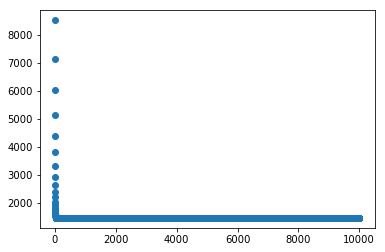

In [112]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [113]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8270)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

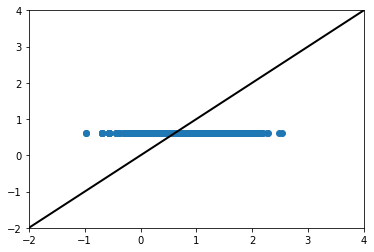

In [114]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.1: Validation Set Performance

In [115]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(31, 21),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(21, 14),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(14, 9),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(9, 6),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(6, 4),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(4, 3),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(3, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight
dim_corrected_model[(8)].weight = model[(8)].weight
dim_corrected_model[(10)].weight = model[(10)].weight
dim_corrected_model[(12)].weight = model[(12)].weight

In [116]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 1210.8693
[torch.FloatTensor of size 1]

In [117]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2709)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

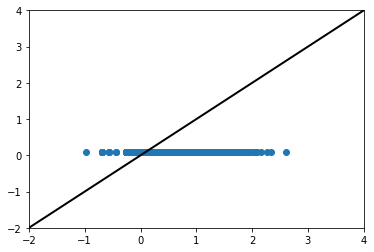

In [118]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 6.2: Test Set Performance

In [119]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model_2 = torch.nn.Sequential(torch.nn.Linear(31, 21),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(21, 14),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(14, 9),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(9, 6),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(6, 4),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(4, 3),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(3, 1))


# Give the new model the old model's parameters
dim_corrected_model_2[(0)].weight = model[(0)].weight
dim_corrected_model_2[(2)].weight = model[(2)].weight
dim_corrected_model_2[(4)].weight = model[(4)].weight
dim_corrected_model_2[(6)].weight = model[(6)].weight
dim_corrected_model_2[(8)].weight = model[(8)].weight
dim_corrected_model_2[(10)].weight = model[(10)].weight
dim_corrected_model_2[(12)].weight = model[(12)].weight

In [120]:
# Get the validation set predictions
y_test_pred = dim_corrected_model_2(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 2587.4443
[torch.FloatTensor of size 1]

In [121]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2712)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

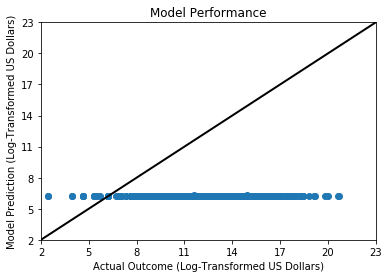

In [122]:
# Plot new predictions versus new data outcomes

plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [123]:
dim_corrected_model_2[(0)].weight

Parameter containing:

Columns 0 to 9 
-0.1489 -0.0590  0.1475  0.1341 -0.1382  0.0723 -0.1623  0.1072  0.0234 -0.0343
 0.1704 -0.1776  0.1467 -0.1101 -0.0981 -0.0650  0.1159  0.0413 -0.0473  0.0251
-0.0339 -0.1410 -0.1394  0.1498  0.1658  0.0672 -0.0828 -0.1607  0.0257 -0.0630
 0.1336 -0.1535 -0.1191 -0.1571 -0.1743  0.0036 -0.0802 -0.0086  0.0964 -0.1027
-0.0556  0.0494  0.1317 -0.1792  0.1081 -0.0112 -0.1736 -0.0819  0.0002  0.0500
 0.0123  0.0695 -0.0820  0.0976  0.1089  0.0107 -0.0593 -0.1696 -0.0240 -0.1313
 0.0364 -0.1062 -0.1163  0.1089 -0.1022  0.1488 -0.0992 -0.1069 -0.0179 -0.1486
-0.0254  0.0041 -0.1793  0.1233  0.1323  0.0494 -0.0105  0.1234 -0.1076 -0.0893
 0.0579 -0.0567  0.0015  0.0831  0.1571 -0.1220  0.0181  0.0857  0.0908  0.0323
 0.0292  0.0730 -0.0660  0.0031  0.0506  0.0306  0.0446  0.0632  0.0509  0.1342
 0.0514  0.0626 -0.1419  0.1199 -0.1533  0.0167  0.1589 -0.1450  0.1550 -0.0748
 0.0040 -0.1687 -0.0912 -0.1443 -0.1083 -0.1120 -0.1079 -0.1088  0.1019 -0.0989
-

In [124]:
dim_corrected_model_2[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.1920 -0.0309  0.1434  0.1993 -0.1861 -0.2095  0.0296 -0.0280 -0.1941 -0.1435
-0.2086 -0.1423 -0.1032  0.2171  0.0669 -0.1074  0.1369 -0.0508 -0.0085 -0.1037
 0.1871 -0.1974 -0.0210 -0.0904  0.0902 -0.1102  0.0024 -0.1281 -0.0442 -0.0779
-0.1947  0.1274  0.0605 -0.0105 -0.0116 -0.1255 -0.2097  0.1339  0.0358 -0.0446
 0.0762  0.0873  0.2152  0.1539  0.0847  0.1416 -0.2175  0.0769  0.0180 -0.0715
 0.1314  0.1877  0.1625 -0.2104 -0.2096 -0.0449 -0.1257 -0.0607 -0.2153  0.1542
-0.1567 -0.2097 -0.0480  0.0294 -0.1739 -0.1123 -0.0018  0.0435  0.0454 -0.1746
 0.0138 -0.1554  0.1117  0.0442 -0.0254 -0.0620 -0.1938  0.2003  0.2029  0.0183
-0.1126 -0.1912  0.0563 -0.1504 -0.0322  0.2127  0.0019 -0.1816  0.0885  0.1979
 0.0071  0.0673  0.2091  0.0493  0.2164 -0.0688 -0.0233 -0.1522 -0.1984 -0.0815
-0.0930 -0.1368  0.1642  0.0212 -0.0622 -0.2085  0.0288  0.1250 -0.0437  0.1671
-0.2160 -0.1753  0.0195  0.0588 -0.1447 -0.1373  0.0314 -0.1139  0.0582  0.1845
 

In [125]:
dim_corrected_model_2[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.1250 -0.2474  0.2453  0.2123 -0.0409  0.0255  0.0687  0.0454  0.0442 -0.2647
-0.1668  0.1761 -0.1470  0.1462 -0.1010 -0.1480  0.1412  0.0944 -0.1634 -0.0097
 0.0536  0.1192  0.1099 -0.1054 -0.1217  0.0501  0.0780 -0.1352  0.0456 -0.0188
 0.2670 -0.1419 -0.0636  0.1546 -0.1251 -0.1851 -0.2004 -0.0313  0.1168  0.2055
-0.0257 -0.2321 -0.1350 -0.1750  0.1172  0.1883  0.1841 -0.2604  0.1333 -0.1137
 0.1617  0.0572  0.1668 -0.0234 -0.1989  0.1702  0.1538  0.2185  0.2368 -0.2057
-0.0902  0.0882  0.0896 -0.1314  0.2604  0.1949  0.1225  0.1653 -0.1109  0.0442
 0.2222 -0.0176 -0.2285  0.0354 -0.0647  0.1886  0.0519 -0.1121  0.0474 -0.2258
 0.1589  0.1856 -0.1586 -0.2440  0.2565  0.0530 -0.1179 -0.1749  0.2187 -0.1870

Columns 10 to 13 
-0.2230  0.0553 -0.1796 -0.0679
 0.0101  0.0817  0.0767  0.1852
 0.2041 -0.0945 -0.0308  0.0649
-0.0709 -0.0508  0.0839 -0.1385
-0.0401 -0.0957  0.0691  0.0818
 0.1996  0.1638  0.1402  0.1914
-0.1344  0.2167  0.2433 -0.137

In [126]:
dim_corrected_model_2[(6)].weight

Parameter containing:
 0.0438  0.1965 -0.0443  0.0905  0.0809  0.0606 -0.0951  0.0673 -0.0712
 0.3211 -0.0005 -0.1249 -0.0338 -0.2534 -0.2084 -0.0702 -0.1961 -0.2093
 0.3041 -0.3298 -0.1489  0.1163 -0.3110  0.0242 -0.3184 -0.0921  0.0535
 0.1917 -0.3094  0.2099 -0.2581  0.0315 -0.2758  0.2760  0.2600  0.1334
 0.0416  0.2156  0.0658 -0.0352 -0.1441 -0.2954  0.1672  0.2938 -0.0266
-0.0547  0.3000  0.0619 -0.1549 -0.1974  0.2980  0.1560 -0.0808  0.0359
[torch.FloatTensor of size 6x9]

In [127]:
dim_corrected_model_2[(8)].weight

Parameter containing:
-0.3993 -0.3034  0.2578 -0.2412  0.2981 -0.3173
 0.0525 -0.1349 -0.1990 -0.2866 -0.0114 -0.2003
-0.2818  0.2581 -0.2544  0.3838  0.3702 -0.1163
 0.0333  0.1348  0.1550 -0.3219  0.2998 -0.2179
[torch.FloatTensor of size 4x6]

In [128]:
dim_corrected_model_2[(10)].weight

Parameter containing:
 0.0198  0.1083 -0.1489 -0.4258
-0.0425 -0.4631  0.0667 -0.1127
-0.1039  0.1285  0.1587  0.2414
[torch.FloatTensor of size 3x4]

In [129]:
dim_corrected_model_2[(12)].weight

Parameter containing:
 0.0414  0.4677 -0.2591
[torch.FloatTensor of size 1x3]

## Round 7: Seven-Hidden-Layer Neural Network

In [130]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [131]:
# Make the neural network
model = torch.nn.Sequential(torch.nn.Linear(31, 21),
                            torch.nn.ReLU(),
                            torch.nn.Linear(21, 14),
                            torch.nn.ReLU(),
                            torch.nn.Linear(14, 9),
                            torch.nn.ReLU(),
                            torch.nn.Linear(9, 6),
                            torch.nn.ReLU(),
                            torch.nn.Linear(6, 4),
                            torch.nn.ReLU(),
                            torch.nn.Linear(4, 3),
                            torch.nn.ReLU(),
                            torch.nn.Linear(3, 2),
                            torch.nn.ReLU(),
                            torch.nn.Linear(2, 1))

In [132]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 5e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

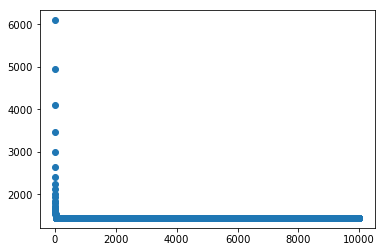

In [133]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [134]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8270)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

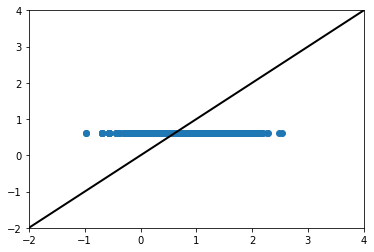

In [135]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.1: Validation Set Performance

In [136]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(31, 21),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(21, 14),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(14, 9),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(9, 6),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(6, 4),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(4, 3),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(3, 2),
                                          torch.nn.ReLU(),
                                          torch.nn.Linear(2, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight
dim_corrected_model[(2)].weight = model[(2)].weight
dim_corrected_model[(4)].weight = model[(4)].weight
dim_corrected_model[(6)].weight = model[(6)].weight
dim_corrected_model[(8)].weight = model[(8)].weight
dim_corrected_model[(10)].weight = model[(10)].weight
dim_corrected_model[(12)].weight = model[(12)].weight
dim_corrected_model[(14)].weight = model[(14)].weight

In [137]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 1160.3055
[torch.FloatTensor of size 1]

In [138]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2709)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

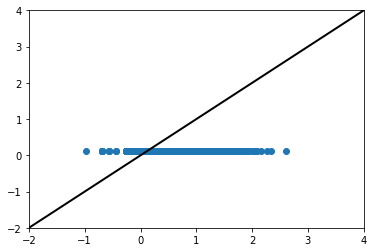

In [139]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 7.2: Test Set Performance

In [140]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model_2 = torch.nn.Sequential(torch.nn.Linear(31, 21),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(21, 14),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(14, 9),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(9, 6),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(6, 4),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(4, 3),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(3, 2),
                                            torch.nn.ReLU(),
                                            torch.nn.Linear(2, 1))


# Give the new model the old model's parameters
dim_corrected_model_2[(0)].weight = model[(0)].weight
dim_corrected_model_2[(2)].weight = model[(2)].weight
dim_corrected_model_2[(4)].weight = model[(4)].weight
dim_corrected_model_2[(6)].weight = model[(6)].weight
dim_corrected_model_2[(8)].weight = model[(8)].weight
dim_corrected_model_2[(10)].weight = model[(10)].weight
dim_corrected_model_2[(12)].weight = model[(12)].weight
dim_corrected_model_2[(14)].weight = model[(14)].weight

In [141]:
# Get the validation set predictions
y_test_pred = dim_corrected_model_2(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 4642.5454
[torch.FloatTensor of size 1]

In [142]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2712)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

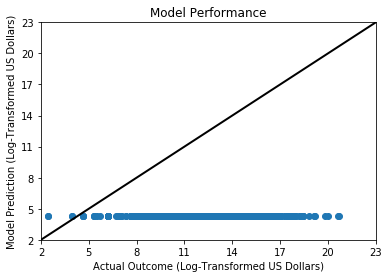

In [143]:
# Plot new predictions versus new data outcomes

plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [144]:
dim_corrected_model_2[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.1778  0.1306  0.0291  0.1345  0.0299  0.0502  0.0749 -0.0039  0.0283 -0.0835
 0.0067  0.0719  0.0853 -0.0238 -0.1266 -0.1043  0.0757 -0.0978 -0.0448 -0.1560
 0.1112 -0.0768 -0.1076  0.0197 -0.1647  0.1037  0.0372 -0.0053  0.0204 -0.1123
 0.0567 -0.1401 -0.0030 -0.0667  0.0422 -0.1591 -0.1262 -0.0012 -0.1787  0.0706
-0.1109  0.0046 -0.1125 -0.0264  0.1244  0.1271  0.1684 -0.1468  0.0183 -0.1672
 0.1659  0.1416  0.1719 -0.1717  0.0332  0.1017  0.1606 -0.0810 -0.0980 -0.1411
-0.1645 -0.1234  0.0752  0.1196  0.1232 -0.1651  0.0139  0.0489 -0.1732 -0.0579
 0.0287  0.0045  0.1182 -0.0073 -0.1216 -0.1676 -0.0043  0.1654 -0.0632  0.1142
-0.0433  0.0238 -0.1522 -0.0871  0.0747 -0.0886 -0.1227 -0.0566 -0.0848  0.0873
-0.1171 -0.1075  0.0892 -0.0905 -0.0641  0.1463 -0.0848 -0.1256  0.1479 -0.0869
-0.1195  0.0681  0.1010 -0.1342  0.1240  0.0976  0.1542  0.0209 -0.0110 -0.0505
-0.0057 -0.0332  0.1633  0.1139  0.0566  0.0150  0.0373 -0.0403 -0.1368 -0.0250
-

In [145]:
dim_corrected_model_2[(2)].weight

Parameter containing:

Columns 0 to 9 
-0.1863 -0.0101 -0.2138 -0.1334  0.0817 -0.0128 -0.0579 -0.1529  0.0187 -0.2106
 0.1429 -0.0319 -0.1210 -0.0426 -0.0531 -0.1718  0.2124 -0.0297 -0.1780  0.1693
 0.0421 -0.0389  0.1415 -0.0579 -0.1232  0.1500 -0.0917  0.0691  0.1807  0.1509
 0.1154  0.1855  0.0935  0.0753 -0.0825 -0.1876 -0.1002  0.1778 -0.0721 -0.1324
 0.1343  0.2089 -0.0431  0.1667  0.2055  0.1610 -0.0834 -0.1707  0.1424  0.1873
 0.1019 -0.1954 -0.1909 -0.0327  0.1129 -0.1208 -0.0702  0.0087  0.2010  0.0742
-0.0158  0.0890  0.1942  0.0358 -0.1707 -0.0012  0.1258  0.2161  0.1789 -0.1448
-0.0046 -0.0746  0.0780  0.2117 -0.0497  0.0139  0.1643 -0.0388  0.1288  0.1160
-0.0625  0.1092  0.0922  0.1629 -0.0460 -0.0126 -0.1544  0.1575 -0.0418 -0.0756
 0.2135  0.0514 -0.2097 -0.1943 -0.2090 -0.2071 -0.0040  0.0110 -0.0780  0.0665
 0.0208  0.0183 -0.0480  0.0518  0.0521 -0.0768 -0.0528  0.2121 -0.1487 -0.0644
 0.1651  0.0417  0.1771 -0.0007  0.1064 -0.2169 -0.0504 -0.0964 -0.0739 -0.0313
 

In [146]:
dim_corrected_model_2[(4)].weight

Parameter containing:

Columns 0 to 9 
-0.0682  0.1215  0.2384  0.2589 -0.0604  0.0444 -0.1913 -0.1927 -0.1620  0.1822
 0.0838  0.0466  0.1740 -0.0855 -0.1362 -0.2075  0.0747 -0.0105  0.1695  0.0627
 0.0368 -0.1391  0.0980 -0.1783 -0.1775  0.1074 -0.0788 -0.2388  0.0095 -0.0997
 0.1649  0.1856 -0.1593  0.1695  0.0504  0.2465 -0.0901  0.0884 -0.0146  0.1113
 0.0859  0.2186  0.0896  0.1184  0.1937 -0.1692 -0.0766 -0.2159 -0.1597  0.0777
-0.1590 -0.1376 -0.1773 -0.1683 -0.0847 -0.2620  0.1384  0.0984 -0.0655 -0.1410
 0.1038  0.0485  0.0906 -0.0666  0.0360 -0.1221 -0.2340  0.2094 -0.0694 -0.0604
 0.0238 -0.2052 -0.0875 -0.0795 -0.2063 -0.2400 -0.0618  0.1292  0.1408  0.0498
-0.1087 -0.2223 -0.1647  0.2157 -0.0237  0.0605 -0.0397  0.2551 -0.2221  0.2010

Columns 10 to 13 
 0.1226  0.0383  0.0904 -0.2327
-0.0461 -0.1811 -0.2479  0.1640
 0.1600 -0.1302  0.1717  0.2053
 0.0932 -0.0076  0.2543  0.1232
-0.0176 -0.0463 -0.0568  0.2634
 0.1588 -0.1599  0.1115  0.1016
 0.2567  0.1491 -0.0188 -0.240

In [147]:
dim_corrected_model_2[(6)].weight

Parameter containing:
-0.0604 -0.0420 -0.1344  0.2564  0.0071 -0.0098  0.2461 -0.0576 -0.2023
 0.2679  0.0495 -0.0834 -0.0770 -0.1270  0.3113 -0.0568 -0.1282 -0.0468
-0.3208 -0.0701  0.1111  0.1839 -0.1341  0.0113  0.2844 -0.2338  0.0737
-0.1572  0.0194 -0.1466  0.0700 -0.0135  0.1840 -0.0774 -0.0643  0.1746
-0.2663  0.1639 -0.2604  0.0476  0.2559 -0.1128  0.3044  0.2561 -0.0735
-0.0012 -0.2237 -0.1073 -0.1506  0.2770 -0.2662  0.1250  0.2601  0.1467
[torch.FloatTensor of size 6x9]

In [148]:
dim_corrected_model_2[(8)].weight

Parameter containing:
-0.3845 -0.3864  0.2535 -0.2170  0.3025  0.2710
-0.2754  0.2208  0.1054  0.1785  0.1214 -0.2118
 0.0955  0.0509  0.3705  0.0136  0.0176  0.2434
-0.0349 -0.2895  0.1556 -0.3095 -0.2278 -0.1305
[torch.FloatTensor of size 4x6]

In [149]:
dim_corrected_model_2[(10)].weight

Parameter containing:
-0.0114 -0.3648 -0.1257  0.4119
 0.1900 -0.0155 -0.1306 -0.1070
 0.4828 -0.4224 -0.0224 -0.4508
[torch.FloatTensor of size 3x4]

In [150]:
dim_corrected_model_2[(12)].weight

Parameter containing:
 0.3015  0.2109 -0.0185
 0.5373 -0.0360  0.1407
[torch.FloatTensor of size 2x3]

In [151]:
dim_corrected_model_2[(14)].weight

Parameter containing:
-0.2875 -0.6757
[torch.FloatTensor of size 1x2]

## Round 8: Linear Regression

In [152]:
# Make the torch Tensor into a PyTorch Variable for dependent variables
outcomes_Variable = Variable(outcomes_Tensor)


# ...for independent variables
features_Variable = Variable(features_Tensor,
                             requires_grad = False)

In [153]:
# Make the neural network - really a regression
model = torch.nn.Sequential(torch.nn.Linear(31, 1))

In [154]:
# To add errors to
errors = []


# Set the learning rate
learning_rate = 4e-6


# Train the neural network
for t in range(10000):
    
    # Get the current predictions
    y_pred = model(features_Variable)
    
    # Compute and append current summed errors
    loss = loss_fn(y_pred, outcomes_Variable)
    errors.append(loss.data[0])
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()
    
    # Backward pass: compute gradient of the loss with respect to all the learnable Variables
    loss.backward()
    
    # Update the weights using gradient descent
    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

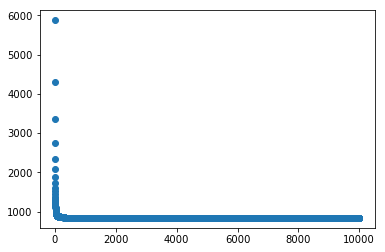

In [155]:
# Plot summed error as a function of iteration
plt.scatter(iterations, errors)

In [156]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_pred_resized = y_pred.resize(8270)


# Make the FloatTensor into a numpy.array
y_pred_array = y_pred_resized.data.numpy()


# Make the numpy.array into a list
y_pred_list = y_pred_array.tolist()

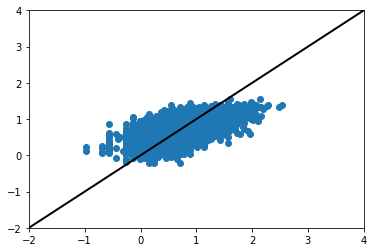

In [157]:
# Plot predictions versus training set outcomes
plt.scatter(outcomes_list, y_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 8.1: Validation Set Performance

In [158]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model = torch.nn.Sequential(torch.nn.Linear(31, 1))


# Give the new model the old model's parameters
dim_corrected_model[(0)].weight = model[(0)].weight

In [159]:
# Get the validation set predictions
y_valid_pred = dim_corrected_model(valid_predictors_Variable)


# Print the loss
loss_fn(y_valid_pred,
        valid_outcomes_Variable)

Variable containing:
 1679.9602
[torch.FloatTensor of size 1]

In [160]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_valid_pred_resized = y_valid_pred.resize(2709)


# Make the FloatTensor into a numpy.array
y_valid_pred_array = y_valid_pred_resized.data.numpy()


# Make the numpy.array into a list
y_valid_pred_list = y_valid_pred_array.tolist()

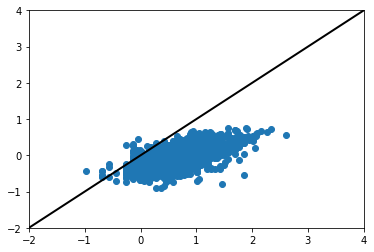

In [161]:
# Plot new predictions versus new data outcomes
plt.scatter(valid_outcomes_list, y_valid_pred_list)

axes = plt.gca()

axes.set_xlim([-2, 4])

axes.set_ylim([-2, 4])

plt.plot([-2, 4], [-2, 4], 'k-', lw=2)

### Round 8.2: Test Set Performance

In [162]:
# Have to make a new model and give it the train_model parameters to fix structure problem
dim_corrected_model_2 = torch.nn.Sequential(torch.nn.Linear(31, 1))


# Give the new model the old model's parameters
dim_corrected_model_2[(0)].weight = model[(0)].weight

In [163]:
# Get the validation set predictions
y_test_pred = dim_corrected_model_2(test_predictors_Variable)


# Print the loss
loss_fn(y_test_pred,
        test_outcomes_Variable)

Variable containing:
 1197.3475
[torch.FloatTensor of size 1]

In [164]:
# Get rid of the 2nd dimension of 1 from the FloatTensor
y_test_pred_resized = y_test_pred.resize(2712)


# Make the FloatTensor into a numpy.array
y_test_pred_array = y_test_pred_resized.data.numpy()


# Convert back to native units and scale
y_test_pred_array = y_test_pred_array*5.409956 + 7.691221


# Make the numpy.array into a list
y_test_pred_list = y_test_pred_array.tolist()

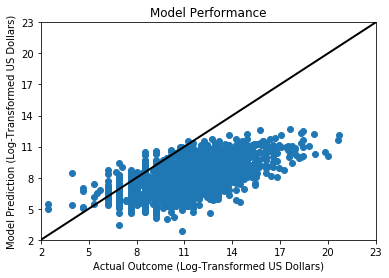

In [165]:
# Plot new predictions versus new data outcomes

plt.scatter(test_outcomes_list, y_test_pred_list)

axes = plt.gca()

axes.set_xlim([2, 23])

axes.set_ylim([2, 23])

axes.set_xticks([2, 5, 8, 11, 14, 17, 20, 23])

axes.set_yticks([2, 5, 8, 11, 14, 17, 20, 23])

plt.plot([2, 23], [2, 23], 'k-', lw=2)

axes.set_xlabel("Actual Outcome (Log-Transformed US Dollars)")

axes.set_ylabel("Model Prediction (Log-Transformed US Dollars)")

axes.set_title("Model Performance")

In [166]:
dim_corrected_model_2[(0)].weight

Parameter containing:

Columns 0 to 9 
 0.0092  0.0065  0.0127  0.1666  0.1841 -0.0245 -0.0082 -0.0179  0.0338 -0.0182

Columns 10 to 19 
 0.0364 -0.0204  0.0242 -0.0239  0.0046 -0.0034  0.0018  0.0134 -0.0103  0.0068

Columns 20 to 29 
 0.0061  0.0188  0.0568  0.0703  0.0351 -0.0209 -0.0975 -0.0174  0.0073 -0.0106

Columns 30 to 30 
 0.0071
[torch.FloatTensor of size 1x31]